In [ ]:
import pandas as pd
import numpy as np

In [176]:
df = pd.DataFrame(np.random.randn(1000, 4),
                   index=pd.date_range('1/1/2000', periods=1000),
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-1.345631,-0.480334,1.210765,-0.778959
2000-01-02,-1.330947,-1.453338,1.067234,-0.030370
2000-01-03,-2.103781,-1.489574,0.178413,1.742600
2000-01-04,0.587861,-1.825354,-0.394148,1.511477
2000-01-05,0.313313,-1.781103,-0.850132,1.810995
2000-01-06,2.391491,-1.379593,0.033909,2.008399
2000-01-07,4.703879,-0.951837,-0.909464,0.886608
2000-01-08,5.853745,-0.780954,-0.975999,1.362537
2000-01-09,4.938456,-1.124858,-0.668452,-0.076425
2000-01-10,6.005580,-1.931926,0.793414,-1.134757


In [177]:
df2 = df.iloc[:20]
df2

,A,B,C,D
2000-01-01,-1.345631,-0.480334,1.210765,-0.778959
2000-01-02,-1.330947,-1.453338,1.067234,-0.030370
2000-01-03,-2.103781,-1.489574,0.178413,1.742600
2000-01-04,0.587861,-1.825354,-0.394148,1.511477
2000-01-05,0.313313,-1.781103,-0.850132,1.810995
2000-01-06,2.391491,-1.379593,0.033909,2.008399
2000-01-07,4.703879,-0.951837,-0.909464,0.886608
2000-01-08,5.853745,-0.780954,-0.975999,1.362537
2000-01-09,4.938456,-1.124858,-0.668452,-0.076425
2000-01-10,6.005580,-1.931926,0.793414,-1.134757


In [178]:
df2['A'].rolling(window=3).corr(df2['B'])
# 第一个数据的计算:pd.Series([df['A'][0], df['A'][1], df['A'][2]]).corr(pd.Series([df['B'][0], df['B'][1], df['B'][2]]))
# 第二个数据的计算:pd.Series([df['A'][1], df['A'][2], df['A'][3]]).corr(pd.Series([df['B'][1], df['B'][2], df['B'][3]]))
# 第三个数据的计算:pd.Series([df['A'][2], df['A'][3], df['A'][4]]).corr(pd.Series([df['B'][2], df['B'][3], df['B'][4]]))
# ......

2000-01-01         NaN
2000-01-02         NaN
2000-01-03    0.512968
2000-01-04   -0.931962
2000-01-05   -0.999586
2000-01-06    0.977589
2000-01-07    0.999922
2000-01-08    0.998681
2000-01-09    0.750852
2000-01-10   -0.352436
2000-01-11   -0.997600
2000-01-12   -0.993237
2000-01-13   -0.960367
2000-01-14   -0.312071
2000-01-15    0.100591
2000-01-16    0.803662
2000-01-17    0.673982
2000-01-18   -0.593686
2000-01-19   -0.016936
2000-01-20   -0.845083
Freq: D, dtype: float64

In [179]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)


In [180]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [181]:
spx_px = close_px_all['SPX']

In [182]:
spx_rets = spx_px.pct_change() # 前元素和先前元素之间的百分比变化
spx_rets.head()

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Name: SPX, dtype: float64

In [183]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
returns = close_px.pct_change()
returns.head()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145


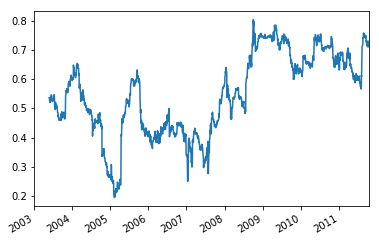

In [184]:
# 计算滚动相关性
relate = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
relate.plot()

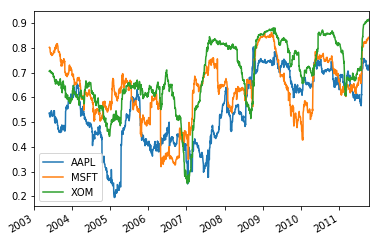

In [185]:
# 一次计算多个滚动相关性
relate1 = returns.rolling(125, min_periods=100).corr(spx_rets)
relate1.plot()